# RANDOM FOREST MODEL 

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


import pandas as pd
import os
import numpy as np
from sklearn import tree

### Exoplanet Identification
#### The variables (columns) in this dataset have been scrubbed based on the sensitivity analysis does on each individual ability to predict whether a Kepler Object of Interest or "koi" is a potential exoplanet.

#### There will be some columns dropped from the dataset before training the model
#### koi_disposition is the "label" that identifies each koi as either a FALSE POSITIVE, CONFIRMED, or CANDIDATE


In [6]:
df = pd.read_csv("data/clean_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()


,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_model_snr,koi_tce_plnt_num,koi_srad
0,CONFIRMED,0,0,0,0,54.418383,162.513840,0.586,4.50700,874.8,2.83,443,25.8,2,0.927
1,FALSE POSITIVE,0,1,0,0,19.899140,175.850252,0.969,1.78220,10829.0,14.60,638,76.3,1,0.868
2,FALSE POSITIVE,0,1,0,0,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395,505.6,1,0.791
3,CONFIRMED,0,0,0,0,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406,40.9,1,1.046
4,CONFIRMED,0,0,0,0,4.134435,172.979370,0.762,3.14020,686.0,2.77,1160,40.2,2,0.972


In [8]:
target = df["koi_disposition"]
target_names = ["confirmed","candidate","false_positive"]

In [9]:
data = df.drop("koi_disposition", axis=1)
feature_names = data.columns
data.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_model_snr,koi_tce_plnt_num,koi_srad
0,0,0,0,0,54.418383,162.513840,0.586,4.50700,874.8,2.83,443,25.8,2,0.927
1,0,1,0,0,19.899140,175.850252,0.969,1.78220,10829.0,14.60,638,76.3,1,0.868
2,0,1,0,0,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395,505.6,1,0.791
3,0,0,0,0,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406,40.9,1,1.046
4,0,0,0,0,4.134435,172.979370,0.762,3.14020,686.0,2.77,1160,40.2,2,0.972


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#### Create Classifier

In [11]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8506864988558352

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9016018306636155

In [18]:
y_pred = clf.predict(X_test)
y_pred

array(['FALSE POSITIVE', 'CANDIDATE', 'FALSE POSITIVE', ..., 'CONFIRMED',
       'CANDIDATE', 'CONFIRMED'], dtype=object)

#### Understanding the importance of each feature

In [20]:
features_weights =sorted(zip(rf.feature_importances_, feature_names), reverse=True)
features_weights

[(0.1441028750253321, 'koi_model_snr'),
 (0.13397174247641563, 'koi_fpflag_co'),
 (0.13077001501864935, 'koi_fpflag_nt'),
 (0.09845726837632615, 'koi_fpflag_ss'),
 (0.09318379420181824, 'koi_prad'),
 (0.06548891034070072, 'koi_depth'),
 (0.057057288763198634, 'koi_period'),
 (0.05005969047707134, 'koi_impact'),
 (0.049456418535574934, 'koi_fpflag_ec'),
 (0.049182981084474706, 'koi_teq'),
 (0.04209817013404036, 'koi_duration'),
 (0.04153860131812527, 'koi_time0bk'),
 (0.03418570612034575, 'koi_srad'),
 (0.010446538127926923, 'koi_tce_plnt_num')]

In [30]:
columns =['weight','feature']
data = np.array(features_weights)
weights_df = pd.DataFrame(data=data, columns=columns)
weights_df[["feature","weight"]] 
weights_df['weight']= pd.to_numeric(weights_df['weight'], downcast = "float")

In [31]:
weights_df.dtypes

weight     float32
feature     object
dtype: object

#### Visualizing Feature Importance

No handles with labels found to put in legend.


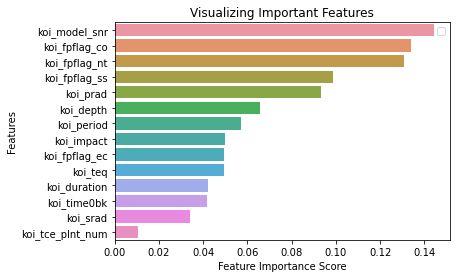

In [32]:
x=weights_df['weight']
y=weights_df['feature']

sns.barplot(x=x, y=y)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

#### Learning the Accuracy of the Model using metrics

In [19]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8506864988558352


#### Make predictions

In [33]:
results=pd.DataFrame({"Actual": y_test,"Prediction": y_pred}).reset_index(drop=True)
results.head(10)

,Actual,Prediction
0,FALSE POSITIVE,FALSE POSITIVE
1,CANDIDATE,CANDIDATE
2,FALSE POSITIVE,FALSE POSITIVE
3,FALSE POSITIVE,FALSE POSITIVE
4,FALSE POSITIVE,FALSE POSITIVE
5,CONFIRMED,CONFIRMED
6,CANDIDATE,CANDIDATE
7,CANDIDATE,CANDIDATE
8,CANDIDATE,CANDIDATE
9,FALSE POSITIVE,FALSE POSITIVE


In [34]:
actuals = results['Actual'].value_counts()
actuals

FALSE POSITIVE    853
CONFIRMED         484
CANDIDATE         411
Name: Actual, dtype: int64

In [35]:
actual_confirmed = actuals[1]
actual_candidate = actuals[2]
actual_FPs = actuals[0]
actuals = [actual_confirmed, actual_candidate, actual_FPs]

In [36]:
## Finding the True Positives
conditions = [
    (results["Prediction"]=="CANDIDATE") & (results['Actual']=="CANDIDATE"),
    (results["Prediction"]=="CONFIRMED") & (results['Actual']=="CONFIRMED"),
    (results["Prediction"]=="FALSE POSITIVE") & (results['Actual']=="FALSE POSITIVE"),
    ]

In [37]:
values = ['TP_Candidate', 'TP_Confirmed','TP_False']

In [38]:
results['True_Positives']=np.select(conditions,values)
results.head()

,Actual,Prediction,True_Positives
0,FALSE POSITIVE,FALSE POSITIVE,TP_False
1,CANDIDATE,CANDIDATE,TP_Candidate
2,FALSE POSITIVE,FALSE POSITIVE,TP_False
3,FALSE POSITIVE,FALSE POSITIVE,TP_False
4,FALSE POSITIVE,FALSE POSITIVE,TP_False


In [39]:
True_Positives = results['True_Positives'].value_counts()
True_Positives

TP_False        834
TP_Confirmed    359
TP_Candidate    294
0               261
Name: True_Positives, dtype: int64

In [40]:
TP_confirmed = True_Positives[2]
TP_falsepositive = True_Positives[0]
TP_candidate = True_Positives[3]
TPs = [TP_confirmed, TP_candidate, TP_falsepositive]

In [41]:
d = {'Label':['Confirmed','Candidate','False Positive'],'Actuals': actuals, 'True_Positives': TPs}
d

{'Label': ['Confirmed', 'Candidate', 'False Positive'],
 'Actuals': [484, 411, 853],
 'True_Positives': [294, 261, 834]}

In [42]:
summary_table = pd.DataFrame(d)
summary_table

,Label,Actuals,True_Positives
0,Confirmed,484,294
1,Candidate,411,261
2,False Positive,853,834


In [43]:
summary_table['Recall'] = summary_table['True_Positives']/summary_table['Actuals']
summary_table

,Label,Actuals,True_Positives,Recall
0,Confirmed,484,294,0.607438
1,Candidate,411,261,0.635036
2,False Positive,853,834,0.977726


# EVALUATION OF MODEL

#### This model has a much better performance (98%) identifying "False Positives" than identifying Confirmed or Candidate Exoplanets.  Althought it is much better than the logistic Regression Model.